## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [76]:
def dt_inplace(df):
    """Automatically detect and convert (in place!) each
    dataframe column of datatype 'object' to a datetime just
    when ALL of its non-NaN values can be successfully parsed
    by pd.to_datetime().  Also returns a ref. to df for
    convenient use in an expression.
    """
    from pandas.errors import ParserError
    for c in df.columns[df.dtypes == 'object']: #don't cnvt num
        try:
            df[c]=pd.to_datetime(df[c])
        except (ParserError,ValueError): #Can't cnvrt some
            pass # ...so leave whole column as-is unconverted
    return df
def read_csv(*args, **kwargs):
    """Drop-in replacement for Pandas pd.read_csv. It invokes
    pd.read_csv() (passing its arguments) and then automatically
    detects and converts each column whose datatype
    is 'object' to a datetime just when ALL the column's
    non-NaN values can be successfully parsed by
    pd.to_datetime(), and returns the resulting dataframe.
    """
    return dt_inplace(pd.read_csv(*args, **kwargs))

In [77]:
taxi_data = read_csv("./data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])


Train data shape: (1458644, 11)


/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [78]:
taxi_data["pickup_datetime"].sort_values()

96469     2016-01-01 00:00:17
223872    2016-01-01 00:00:53
713067    2016-01-01 00:01:01
652463    2016-01-01 00:01:14
722901    2016-01-01 00:01:20
                  ...        
853710    2016-06-30 23:58:52
419031    2016-06-30 23:59:09
1008720   2016-06-30 23:59:10
405743    2016-06-30 23:59:37
500524    2016-06-30 23:59:39
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [79]:
taxi_data["dropoff_datetime"].sort_values()

404427   2016-01-01 00:03:31
652463   2016-01-01 00:05:54
739503   2016-01-01 00:07:13
432779   2016-01-01 00:07:25
713067   2016-01-01 00:07:49
                 ...        
59891    2016-07-01 16:37:39
781313   2016-07-01 19:54:54
801915   2016-07-01 20:17:00
299268   2016-07-01 22:10:26
913682   2016-07-01 23:02:03
Name: dropoff_datetime, Length: 1458644, dtype: datetime64[ns]

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [80]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [81]:
print(f"Максимальное количество уникальных таксопарков {taxi_data['vendor_id'].nunique()}")

Максимальное количество уникальных таксопарков 2


In [82]:
print(f"Максимальное количество пассажиров {taxi_data['passenger_count'].max()}")

Максимальное количество пассажиров 9


In [83]:
print(f"Среднее время поездки {round(taxi_data['trip_duration'].mean())}")

Среднее время поездки 959


In [84]:
print(f"Медианное время поездки {taxi_data['trip_duration'].median()}")

Медианное время поездки 662.0


In [85]:
print(f"Минимальное время поездки {taxi_data['trip_duration'].min()}")

Минимальное время поездки 1


In [86]:
print(f"Максимальное время поездки {taxi_data['trip_duration'].max()}")

Максимальное время поездки 3526282


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [87]:
from datetime import datetime
from pandas import DataFrame

def add_datetime_features(df: DataFrame) -> DataFrame:
    # Преобразуем столбец 'pickup_datetime' в формат datetime
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    # Извлекаем дату без времени и сохраняем в новом столбце 'pickup_date'
    df['pickup_date'] = df['pickup_datetime'].dt.date
    # Извлекаем час дня и сохраняем в новом столбце 'pickup_hour'
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    # Извлекаем наименование дня недели и сохраняем в новом столбце 'pickup_day_of_week'
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df


In [88]:
taxi_data = add_datetime_features(taxi_data)

In [89]:
# Подсчет количества поездок в субботу
saturday_trips = taxi_data[taxi_data['pickup_day_of_week'] == 'Saturday'].shape[0]
print("Количество поездок в субботу:", saturday_trips)


Количество поездок в субботу: 220868


In [90]:
# Расчет среднего количества поездок в день
average_trips_per_day = round(taxi_data.shape[0] / taxi_data['pickup_date'].nunique())
print("Среднее количество поездок в день:", average_trips_per_day)

Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [91]:
holiday_data = pd.read_csv('./data/holiday_data.csv', sep=';')
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [92]:
def add_holiday_features(
        trips_df: DataFrame,
        holidays_df: DataFrame,
        holiday_date_col: str = 'date',
        pickup_date_col: str = 'pickup_date'
) -> DataFrame:
    # Преобразуем столбцы с датами в формат datetime
    trips_df[pickup_date_col] = pd.to_datetime(trips_df[pickup_date_col])
    holidays_df[holiday_date_col] = pd.to_datetime(holidays_df[holiday_date_col])
    # Создаем столбец 'pickup_holiday' и заполняем его нулями (0 - нет праздника)
    trips_df['pickup_holiday'] = 0
    # Объединяем таблицы по дате
    merged_df = pd.merge(trips_df, holidays_df, left_on=pickup_date_col, right_on=holiday_date_col, how='left')
    # Заменяем пропущенные значения в столбце 'pickup_holiday' на 1 (1 - праздник)
    merged_df.loc[merged_df[holiday_date_col].notnull(), 'pickup_holiday'] = 1
    # Удаляем столбец 'holiday_date', который больше не нужен
    merged_df = merged_df.drop(holiday_date_col, axis=1)

    return merged_df


def calculate_median_trip_duration(trips_df: DataFrame) -> int:
    # Фильтруем только праздничные дни
    holiday_trips = trips_df[trips_df['pickup_holiday'] == 1]
    # Рассчитываем медианную длительность поездки в секундах
    median_duration = holiday_trips['trip_duration'].median()
    # Округляем до целого числа
    rounded_median_duration = round(median_duration)
    return rounded_median_duration

In [93]:
taxi_data = add_holiday_features(trips_df=taxi_data, holidays_df=holiday_data)

In [94]:
taxi_data[taxi_data['pickup_holiday'] == 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,day,holiday
44,id3326491,2,2016-02-12 07:41:56,2016-02-12 07:51:15,1,-73.979645,40.739632,-73.994728,40.723495,N,559,2016-02-12,7,Friday,1,Friday,Lincoln's Birthday
52,id0675800,2,2016-02-15 09:25:15,2016-02-15 09:35:49,6,-73.977753,40.754631,-74.001678,40.756420,N,634,2016-02-15,9,Monday,1,Monday,Presidents' Day
121,id2648478,1,2016-01-18 11:13:59,2016-01-18 11:18:56,1,-73.951576,40.766468,-73.960213,40.760540,N,297,2016-01-18,11,Monday,1,Monday,Martin Luther King Jr. Day
161,id0195963,2,2016-06-19 18:39:05,2016-06-19 18:48:39,1,-73.999161,40.744370,-73.988708,40.758701,N,574,2016-06-19,18,Sunday,1,Sunday,Father's Day
164,id3620795,1,2016-01-01 10:45:24,2016-01-01 10:51:47,1,-74.001610,40.740810,-73.996223,40.725903,N,383,2016-01-01,10,Friday,1,Friday,New Years Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458575,id0420075,2,2016-05-30 03:52:41,2016-05-30 03:56:07,1,-74.003891,40.751667,-74.001350,40.746571,N,206,2016-05-30,3,Monday,1,Monday,Memorial Day
1458602,id2089150,1,2016-05-30 14:42:12,2016-05-30 14:42:38,1,-74.015457,40.708027,-74.015396,40.708138,N,26,2016-05-30,14,Monday,1,Monday,Memorial Day
1458623,id3369208,1,2016-01-18 20:35:30,2016-01-18 20:44:44,1,-73.991081,40.737408,-73.987671,40.722622,N,554,2016-01-18,20,Monday,1,Monday,Martin Luther King Jr. Day
1458628,id0986544,2,2016-05-30 03:08:19,2016-05-30 03:14:10,2,-73.988632,40.721378,-73.975548,40.728519,N,351,2016-05-30,3,Monday,1,Monday,Memorial Day


Удалим не нужные после проверки результата функции колонки

In [95]:
taxi_data = taxi_data.drop(['day','holiday'], axis=1)

In [96]:
# trips_df - таблица с данными о поездках
median_trip_duration = calculate_median_trip_duration(trips_df=taxi_data)
print("Медианная длительность поездки на такси в праздничные дни:", median_trip_duration, "секунд")

Медианная длительность поездки на такси в праздничные дни: 585 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [97]:
osrm_data = pd.read_csv('./data/osrm_data_train.csv')
osrm_data.sample(15)

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
117611,id3748871,Chatham Square,West 33rd Street,4854.0,656.8,10,Chatham Square|Bowery|Cooper Square|Cooper Squ...,24.6|1544.7|180.7|25.2|187.3|513.8|668.4|1493....,4.9|205.8|29.7|3.4|22.8|70.5|85|210.6|24.1|0,depart|new name|new name|continue|continue|new...,right|straight|straight|sharp left|right|strai...,"-73.997687,40.713832|-73.997492,40.713996|-73...."
1000913,id3947428,Park Avenue,2nd Avenue,2373.2,215.9,4,Park Avenue|East 54th Street|2nd Avenue|2nd Av...,133.7|536.9|1702.6|0,18.1|45.2|152.6|0,depart|turn|turn|arrive,none|left|right|arrive,"-73.971499,40.76078|-73.97227,40.759729|-73.96..."
568016,id1226683,Central Park North,2nd Avenue,2018.8,241.7,5,Central Park North|5th Avenue|East 106th Stree...,344|293.7|836.4|544.8|0,32.4|32.5|134.5|42.3|0,depart|turn|turn|turn|arrive,none|right|left|right|arrive,"-73.952618,40.79831|-73.949426,40.796597|-73.9..."
119182,id1893315,Lafayette Street,3rd Avenue,1302.0,181.8,4,Lafayette Street|East 8th Street|3rd Avenue|3r...,712.4|112.3|477.2|0,94.3|21.9|65.6|0,depart|turn|turn|arrive,none|right|left|arrive,"-73.995648,40.724696|-73.991069,40.730045|-73...."
14064,id3534611,East 15th Street,7th Avenue South,1262.1,168.6,3,East 15th Street|7th Avenue|7th Avenue South,596.7|665.3|0,78.2|90.4|0,depart|turn|arrive,none|left|arrive,"-73.992995,40.736638|-73.999185,40.739243|-74...."
1119076,id3223802,West 109th Street,7th Avenue,9812.0,769.0,12,West 109th Street|Broadway|West End Avenue|Wes...,260.4|103.5|953.4|202.7|126.4|537.4|3316.1|285...,42.8|7.7|88.5|13.2|10.2|43|134.7|259.2|43|119....,depart|turn|fork|turn|on ramp|off ramp|merge|n...,none|left|slight right|right|straight|slight r...,"-73.964539,40.802474|-73.967243,40.803611|-73...."
495725,id3886300,West 28th Street,8th Avenue,2485.4,298.4,7,West 28th Street|Broadway|West 27th Street|6th...,12.9|84.6|202.6|1441.5|546.9|196.9|0,4.1|16.1|26.7|183.7|41.8|26|0,depart|turn|turn|turn|turn|turn|arrive,right|right|right|right|left|right|arrive,"-73.988863,40.745342|-73.988729,40.745286|-73...."
903867,id1079460,Broadway,Lawrence Street,6139.7,683.2,13,Broadway|Union Square West|East 14th Street|Br...,242|241|90.2|346.9|232.6|148.1|311|1270.6|2311...,34.9|38.4|12.8|49.6|32|20.7|40.7|171.9|179.3|4...,depart|new name|turn|turn|turn|turn|new name|n...,left|straight|left|right|left|right|straight|s...,"-73.989748,40.73924|-73.990343,40.737114|-73.9..."
1293531,id1646977,East 22nd Street,East 70th Street,5249.4,416.3,11,East 22nd Street|3rd Avenue|East 23rd Street|F...,262.6|85|805.1|435.1|90.9|2495.8|74.2|273.2|71...,38.8|13.6|101.1|48.7|7.2|115.1|6.7|24.1|59.8|1...,depart|turn|turn|end of road|on ramp|merge|off...,left|left|right|left|slight left|slight left|s...,"-73.986357,40.739311|-73.983638,40.738158|-73...."
1276688,id2942806,Broadway,Terminal C - Departures,34126.5,1597.7,24,Broadway|West 125th Street|Marginal Street|Cat...,948.1|412.4|98.5|339.4|5630.8|1141.1|287.5|165...,62.4|35.5|6.5|27.1|227.3|91.4|19.9|18.5|6.2|11...,depart|turn|end of road|on ramp|merge|new name...,none|left|left|straight|slight left|straight|l...,"-73.963675,40.808188|-73.958248,40.815657|-73...."


In [98]:
def add_osrm_features(trips_df: DataFrame, osrm_df: DataFrame) -> DataFrame:
    # Выбираем интересующие нас столбцы из таблицы с данными из OSRM
    osrm_subset = osrm_df[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    # Объединяем таблицы по столбцу 'id' с типом объединения 'left'
    merged_df = pd.merge(trips_df, osrm_subset, on='id', how='left')
    return merged_df


In [99]:
taxi_data_with_osrm = add_osrm_features(trips_df=taxi_data, osrm_df=osrm_data)
taxi_data_with_osrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  datetime64[ns]
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_day_o

In [100]:
taxi_data_with_osrm.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
332957,id1457151,1,2016-01-02 11:35:10,2016-01-02 11:40:38,2,-73.982803,40.747929,-73.972862,40.765045,Y,328,2016-01-02,11,Saturday,0,2254.2,213.4,3.0
1275652,id0003735,2,2016-06-02 13:01:20,2016-06-02 13:15:10,1,-73.953453,40.766941,-73.977631,40.752522,N,830,2016-06-02,13,Thursday,0,3540.3,266.4,8.0
719458,id2720810,2,2016-05-15 10:59:04,2016-05-15 11:09:19,1,-73.987358,40.720058,-73.992455,40.724895,N,615,2016-05-15,10,Sunday,0,871.9,125.8,5.0
734226,id3967101,1,2016-01-27 22:31:19,2016-01-27 22:38:23,1,-73.977661,40.784027,-73.967896,40.800270,N,424,2016-01-27,22,Wednesday,0,2107.2,174.9,4.0
389428,id1364247,1,2016-02-20 05:25:58,2016-02-20 05:44:19,1,-73.988678,40.722351,-73.990143,40.773388,N,1101,2016-02-20,5,Saturday,0,9315.5,751.2,12.0


In [101]:
def calculate_duration_difference(
        trips_df: DataFrame,
        trip_duration_col: str = 'trip_duration',
        osrm_duration_col: str = 'total_travel_time'
) ->DataFrame:
    # Рассчитываем медианную длительность поездки в исходных данных
    median_duration_data = trips_df[trip_duration_col].median()
    # Рассчитываем медианную длительность поездки из OSRM
    median_duration_osrm = trips_df[osrm_duration_col].median()
    # Вычисляем разницу в секундах
    duration_difference = median_duration_data - median_duration_osrm
    # Округляем до целого числа
    rounded_duration_difference = round(duration_difference)
    return rounded_duration_difference


In [102]:
duration_difference = calculate_duration_difference(trips_df=taxi_data_with_osrm)
print("Разница в длительности поездки:", duration_difference, "секунд")

Разница в длительности поездки: 372 секунд


In [103]:
def get_haversine_distance(lat1: float, lng1: float, lat2: float, lng2: float) -> float:
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1: float, lng1: float, lat2: float, lng2: float) -> float:
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

def add_geographical_features(trips_df: DataFrame) -> DataFrame:
    # Рассчитываем расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен
    trips_df['haversine_distance'] = get_haversine_distance(trips_df['pickup_latitude'],
                                                            trips_df['pickup_longitude'],
                                                            trips_df['dropoff_latitude'],
                                                            trips_df['dropoff_longitude'])

    # Рассчитываем направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен
    trips_df['direction'] = get_angle_direction(trips_df['pickup_latitude'],
                                                trips_df['pickup_longitude'],
                                                trips_df['dropoff_latitude'],
                                                trips_df['dropoff_longitude'])

    return trips_df

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [104]:
taxi_data_with_osrm = add_geographical_features(trips_df=taxi_data_with_osrm)

In [105]:
median_haversine_distance = taxi_data_with_osrm['haversine_distance'].median()
rounded_median_haversine_distance = round(median_haversine_distance, 2)
print("Медианное расстояние Хаверсина поездок:", rounded_median_haversine_distance, "километров")

Медианное расстояние Хаверсина поездок: 2.09 километров


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [106]:
def add_cluster_features(trips_df: DataFrame, ) -> DataFrame:
    coordinates = np.hstack((trips_df[['pickup_latitude', 'pickup_longitude']],
                        trips_df[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
    kmeans = cluster.KMeans(n_clusters=10, random_state=42)
    kmeans.fit(coordinates)

    # Получаем прогнозы кластеров для точек поездок
    clusters = kmeans.predict(coordinates)

    # Добавляем столбец 'geo_cluster' в таблицу с данными о поездках
    trips_df['geo_cluster'] = clusters

    return trips_df

In [107]:
taxi_data_with_osrm_and_clusters = add_cluster_features(trips_df=taxi_data_with_osrm)

/home/dzailz/urfu/project/.venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
# Подсчитываем количество поездок в каждом географическом кластере
cluster_counts = taxi_data_with_osrm_and_clusters['geo_cluster'].value_counts()
# Находим наименьшее количество поездок в кластере
min_cluster_size = cluster_counts.min()
print("Наименьшее количество поездок в географическом кластере:", min_cluster_size)

Наименьшее количество поездок в географическом кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [109]:
weather_data = read_csv('./data/weather_data.csv', usecols=[
    'date','hour','temperature','visibility','wind speed','precip','events'
])

weather_data['pickup_date'] = pd.to_datetime(weather_data['date'])
weather_data['pickup_hour'] = weather_data['hour'].astype('int32')

weather_data = weather_data.drop(columns=['date', 'hour'])

def add_weather_features(trips_df: DataFrame, weather_df: DataFrame) -> DataFrame:

    merged_df = trips_df.merge(weather_df, how='left', on=['pickup_date','pickup_hour'])
    return merged_df
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   temperature  8787 non-null   float64       
 1   visibility   8787 non-null   float64       
 2   wind speed   8787 non-null   float64       
 3   precip       8787 non-null   float64       
 4   events       455 non-null    object        
 5   pickup_date  8787 non-null   datetime64[ns]
 6   pickup_hour  8787 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 446.3+ KB


/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])


In [110]:
# Обновим исходный taxi_data
taxi_data = add_weather_features(trips_df=taxi_data_with_osrm_and_clusters, weather_df=weather_data)

In [111]:
# Подсчитываем количество поездок в снежную погоду
snow_trips_count = len(taxi_data[taxi_data['events'] == 'Snow'])
print("Количество поездок в снежную погоду:", snow_trips_count)

Количество поездок в снежную погоду: 13126


In [112]:
# Получаем общее количество наблюдений в таблице
total_observations = len(taxi_data)

# Подсчитываем количество пропущенных значений в каждом столбце погодных условий
missing_values = taxi_data[['temperature', 'visibility', 'wind speed', 'precip', 'events']].isna().sum()

# Вычисляем долю пропусков для каждого столбца
missing_percentages = (missing_values / total_observations) * 100

# Вычисляем среднюю долю пропусков для всех столбцов
average_missing_percentage = missing_percentages.mean()

print("Доля пропусков в столбцах с погодными условиями:", round(average_missing_percentage, 2), "%")
missing_percentages

Доля пропусков в столбцах с погодными условиями: 19.68 %


temperature     0.824876
visibility      0.824876
wind speed      0.824876
precip          0.824876
events         95.103192
dtype: float64

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями - temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [113]:
def fill_null_weather_data(trips_df: DataFrame) -> DataFrame:
    # Заполнение пропусков в столбцах с погодными условиями
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    trips_df[weather_cols] = trips_df.groupby('pickup_date')[weather_cols].transform(lambda x: x.fillna(x.median()))
    trips_df['events'] = trips_df['events'].fillna('None')

    # Заполнение пропусков в столбцах из OSRM API
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    trips_df[osrm_cols] = trips_df[osrm_cols].fillna(trips_df[osrm_cols].median())

    return trips_df


In [114]:
taxi_data = fill_null_weather_data(trips_df=taxi_data)

In [115]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


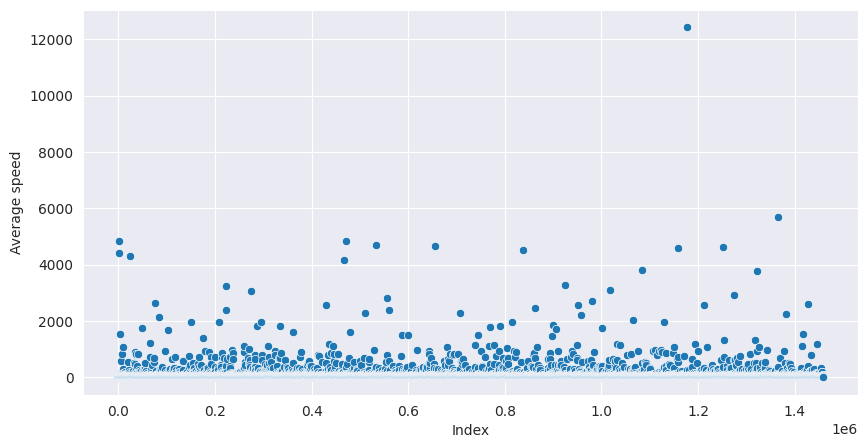

In [116]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [117]:
# Фильтрация поездок с длительностью более 24 часов
filtered_trips_d = taxi_data[taxi_data['trip_duration'] <= 24 * 3600]

# Проверка результатов
print("Количество поездок до удаления:", len(taxi_data))
print("Количество поездок после удаления:", len(filtered_trips_d))
print("Разница до и после удаления:", len(taxi_data) - len(filtered_trips_d))
taxi_data = filtered_trips_d

Количество поездок до удаления: 1458644
Количество поездок после удаления: 1458640
Разница до и после удаления: 4


In [118]:
# Вычисление средней скорости по кратчайшему пути
taxi_data['average_speed'] = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6

# Фильтрация поездок со средней скоростью более 300 км/ч
filtered_trips = taxi_data[taxi_data['average_speed'] <= 300]

# Проверка результатов
print("Количество поездок до удаления:", len(taxi_data))
print("Количество поездок после удаления:", len(filtered_trips))
print("Разница до и после удаления:", len(taxi_data) - len(filtered_trips))
taxi_data = filtered_trips

Количество поездок до удаления: 1458640
Количество поездок после удаления: 1458233
Разница до и после удаления: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [119]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

/tmp/ipykernel_10218/3435407140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)


### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

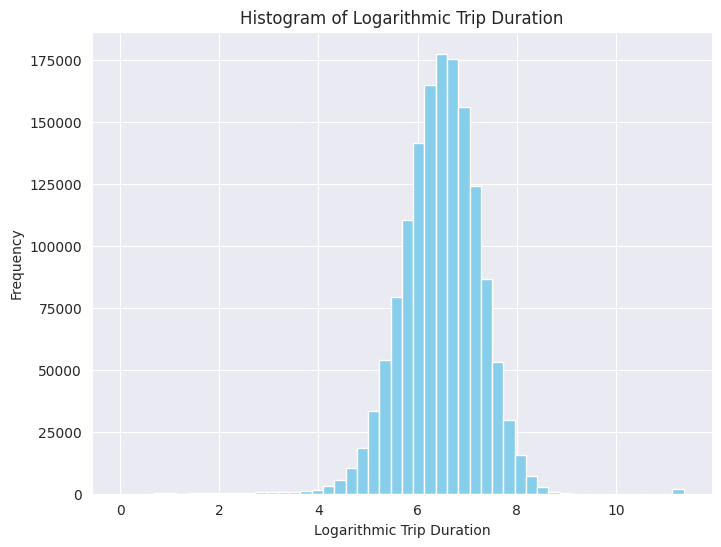

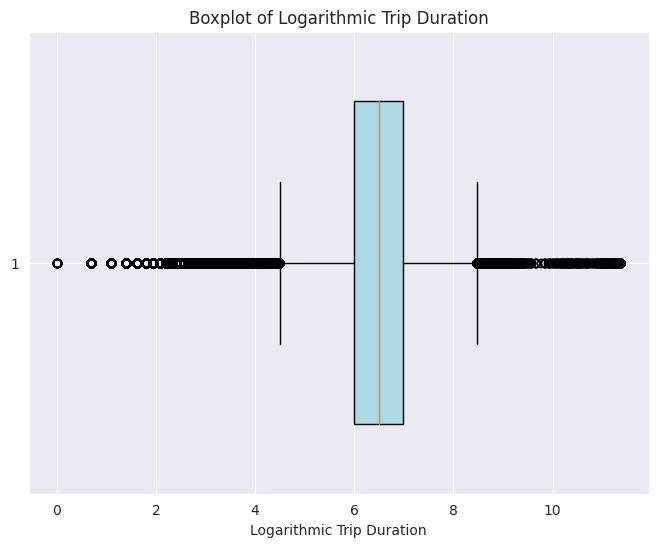

In [120]:
# Преобразование длительности поездок в логарифмическую шкалу
trip_duration_log = np.log(taxi_data['trip_duration'])

# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.hist(trip_duration_log, bins=50, color='skyblue')
plt.xlabel('Logarithmic Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithmic Trip Duration')
plt.grid(True)
plt.show()

# Построение коробчатой диаграммы
plt.figure(figsize=(8, 6))
plt.boxplot(trip_duration_log, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Logarithmic Trip Duration')
plt.title('Boxplot of Logarithmic Trip Duration')
plt.grid(True)
plt.show()

In [121]:
from scipy.stats import normaltest

# Проведение теста Д'Агостино на нормальность
statistic, p_value = normaltest(trip_duration_log)

# Вывод результатов теста
print(f"Statistic: {round(statistic, 2)}")
print(f"P-value: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Null hypothesis rejected. The data is NOT normally distributed.")
else:
    print("Null hypothesis not rejected. The data IS normally distributed.")

Statistic: 152052.09
P-value: 0.0
Null hypothesis rejected. The data is NOT normally distributed.


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

/tmp/ipykernel_10218/166097797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'])


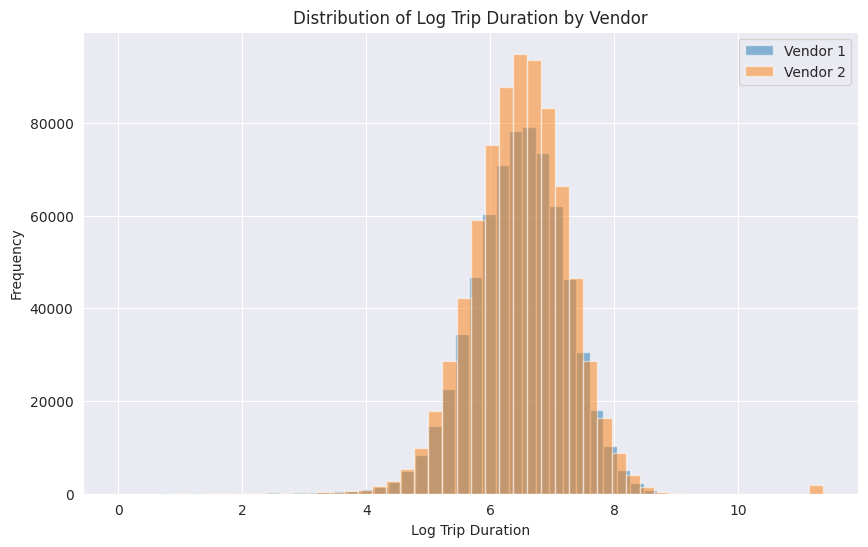

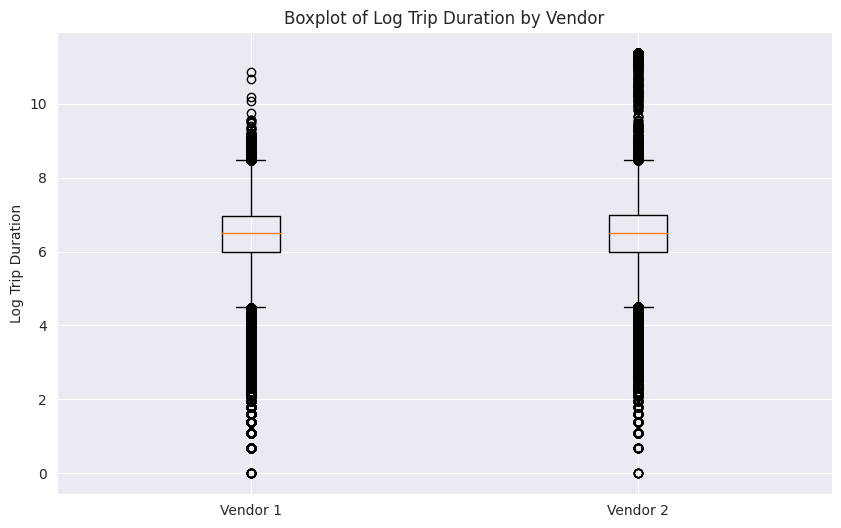

In [122]:
# Разделение данных на две группы по таксопаркам
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'])
data_vendor1 = taxi_data[taxi_data['vendor_id'] == 1]
data_vendor2 = taxi_data[taxi_data['vendor_id'] == 2]

# Построение гистограммы для каждого таксопарка
plt.figure(figsize=(10, 6))
plt.hist(data_vendor1['trip_duration_log'], bins=50, alpha=0.5, label='Vendor 1')
plt.hist(data_vendor2['trip_duration_log'], bins=50, alpha=0.5, label='Vendor 2')
plt.xlabel('Log Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Log Trip Duration by Vendor')
plt.legend()
plt.show()

# Построение коробчатой диаграммы для каждого таксопарка
plt.figure(figsize=(10, 6))
plt.boxplot([data_vendor1['trip_duration_log'], data_vendor2['trip_duration_log']], labels=['Vendor 1', 'Vendor 2'])
plt.ylabel('Log Trip Duration')
plt.title('Boxplot of Log Trip Duration by Vendor')
plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

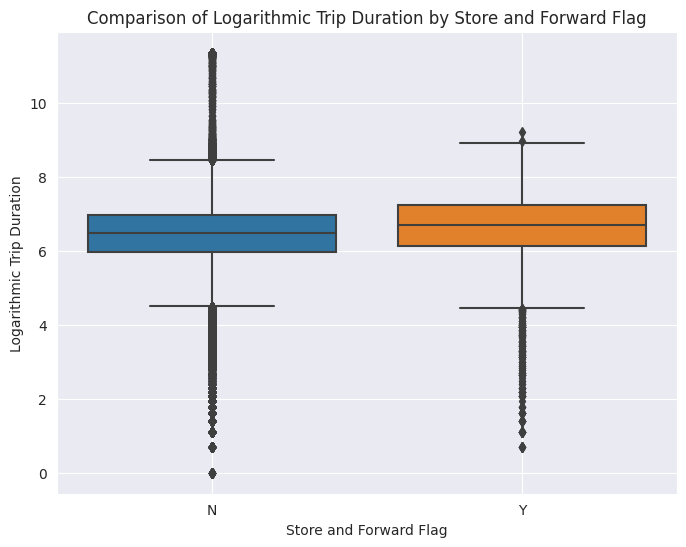

In [123]:
# Группировка данных по признаку store_and_fwd_flag и расчет медианного значения trip_duration_log
grouped = taxi_data.groupby('store_and_fwd_flag')['trip_duration_log'].median()

# Построение графика
plt.figure(figsize=(8, 6))
sns.boxplot(x='store_and_fwd_flag', y='trip_duration_log', data=taxi_data, order=['N', 'Y'])
plt.xlabel('Store and Forward Flag')
plt.ylabel('Logarithmic Trip Duration')
plt.title('Comparison of Logarithmic Trip Duration by Store and Forward Flag')
plt.grid(True)
plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

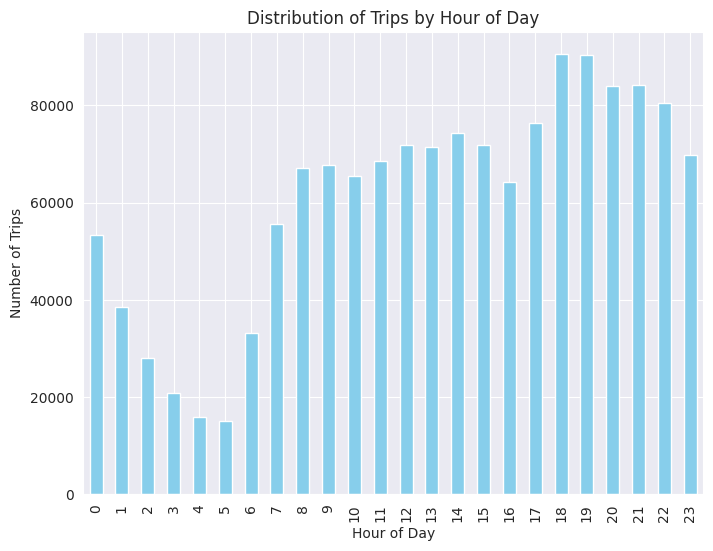

In [124]:
# Группировка данных по часу дня и подсчет количества поездок
hourly_counts = taxi_data.groupby(taxi_data['pickup_hour'])['id'].count()

# Построение графика
plt.figure(figsize=(8, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Hour of Day')
plt.grid(True)
plt.show()

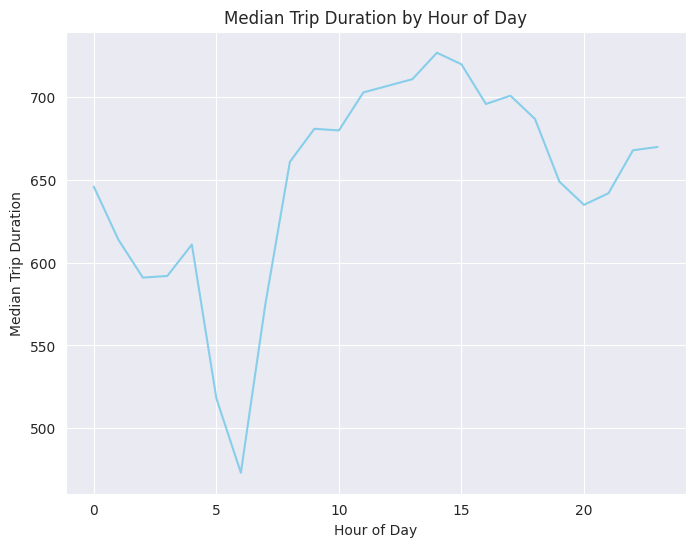

In [125]:
# Группировка данных по часу дня и расчет медианной длительности поездки
hourly_median_duration = taxi_data.groupby(taxi_data['pickup_hour'])['trip_duration'].median()

# Построение графика
plt.figure(figsize=(8, 6))
hourly_median_duration.plot(color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Median Trip Duration')
plt.title('Median Trip Duration by Hour of Day')
plt.grid(True)
plt.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


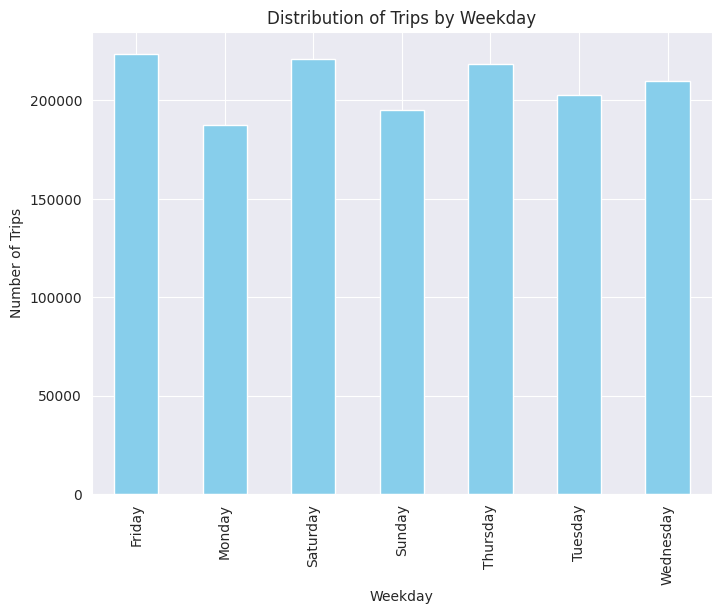

In [126]:
# Группировка данных по дню недели и подсчет количества поездок
daily_counts = taxi_data.groupby(taxi_data['pickup_day_of_week'])['id'].count()

# Построение графика
plt.figure(figsize=(8, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips by Weekday')
plt.grid(True)
plt.show()

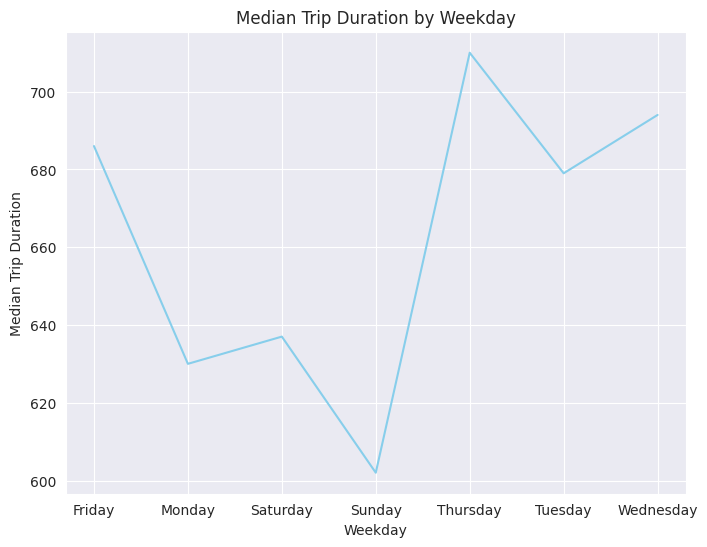

In [127]:
# Группировка данных по дню недели и расчет медианной длительности поездки
daily_median_duration = taxi_data.groupby(taxi_data['pickup_day_of_week'])['trip_duration'].median()

# Построение графика
plt.figure(figsize=(8, 6))
daily_median_duration.plot(color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Median Trip Duration')
plt.title('Median Trip Duration by Weekday')
plt.grid(True)
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

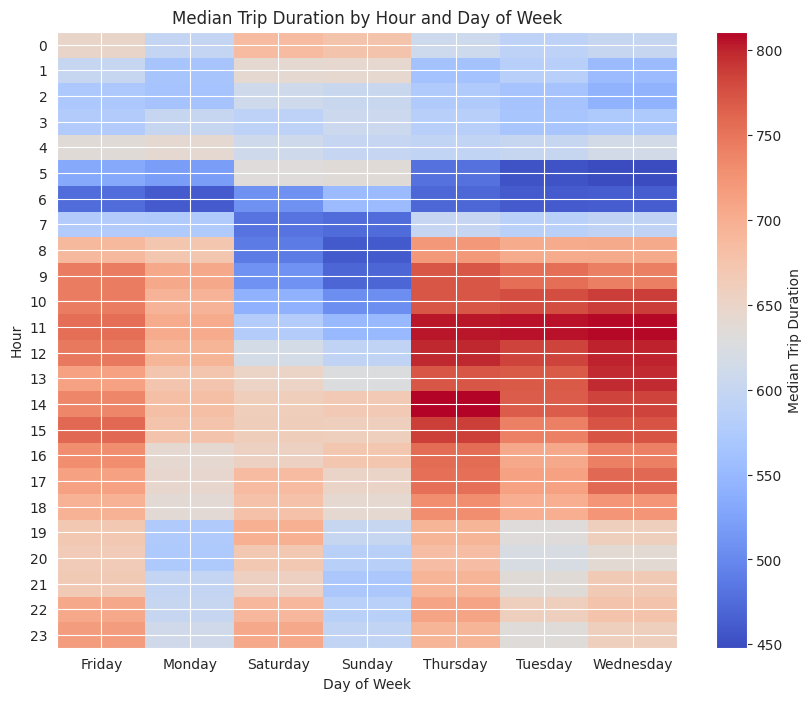

In [128]:
# Создание сводной таблицы
pivot_table = taxi_data.pivot_table(values='trip_duration', index='pickup_hour', columns='pickup_day_of_week', aggfunc='median')

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Median Trip Duration')
plt.title('Median Trip Duration by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()


### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


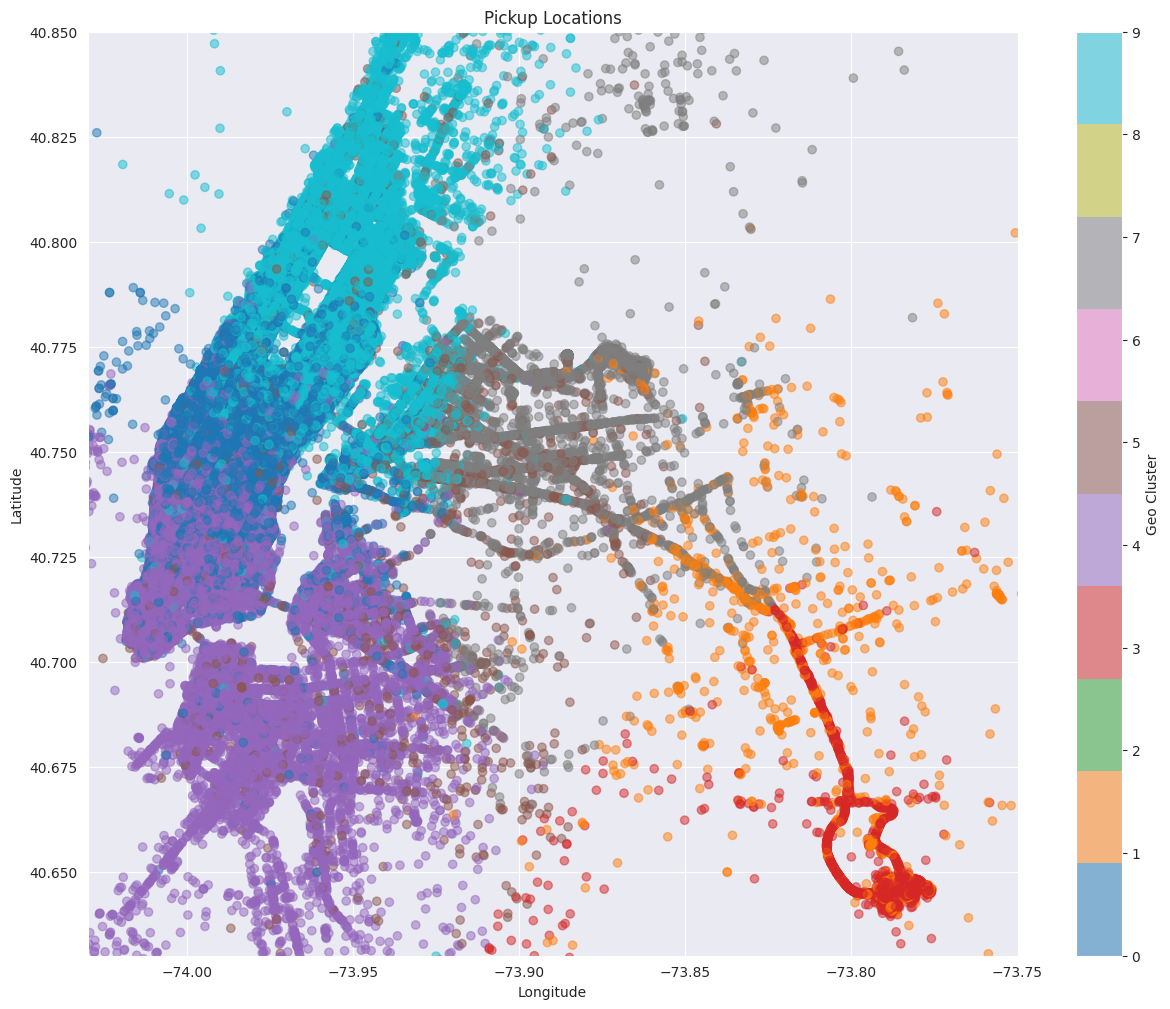

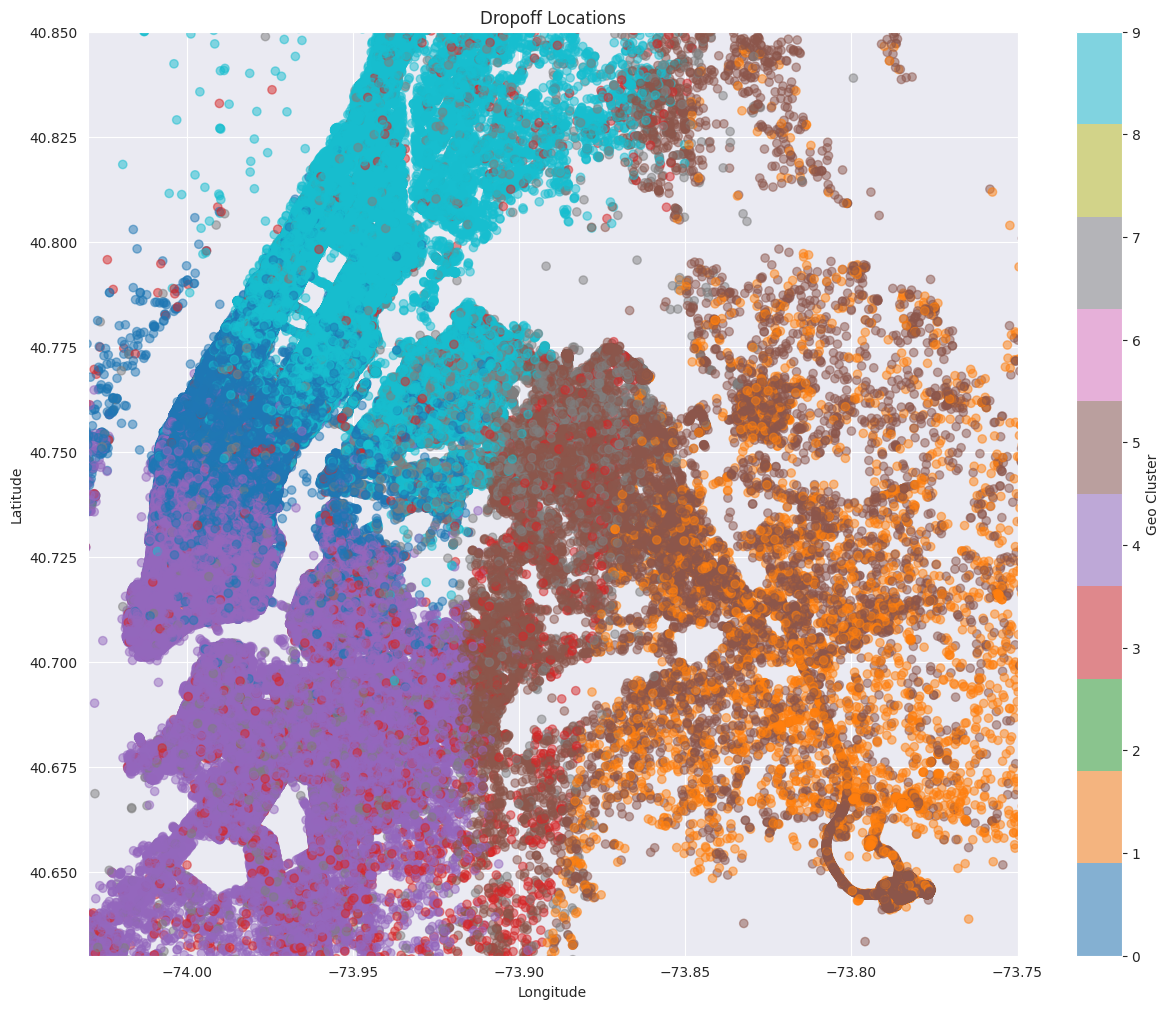

In [129]:
# Границы города Нью-Йорк
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Scatter-диаграмма точек начала поездок
plt.figure(figsize=(15, 12))
plt.scatter(taxi_data['pickup_longitude'], taxi_data['pickup_latitude'], c=taxi_data['geo_cluster'], cmap='tab10', alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Geo Cluster')
plt.grid(True)
plt.show()

# Scatter-диаграмма точек завершения поездок
plt.figure(figsize=(15, 12))
plt.scatter(taxi_data['dropoff_longitude'], taxi_data['dropoff_latitude'], c=taxi_data['geo_cluster'], cmap='tab10', alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Geo Cluster')
plt.grid(True)
plt.show()


## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [130]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 28)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'average_speed', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [131]:
train_data = taxi_data.copy()
train_data = train_data.drop(columns='average_speed', axis=1)
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.120297
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.496775
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661056
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.061457
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.075346


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [132]:
train_data = train_data.drop(columns=['id', 'dropoff_datetime'], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458233 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458233 non-null  int64         
 1   pickup_datetime     1458233 non-null  datetime64[ns]
 2   passenger_count     1458233 non-null  int64         
 3   pickup_longitude    1458233 non-null  float64       
 4   pickup_latitude     1458233 non-null  float64       
 5   dropoff_longitude   1458233 non-null  float64       
 6   dropoff_latitude    1458233 non-null  float64       
 7   store_and_fwd_flag  1458233 non-null  object        
 8   trip_duration       1458233 non-null  int64         
 9   pickup_date         1458233 non-null  datetime64[ns]
 10  pickup_hour         1458233 non-null  int32         
 11  pickup_day_of_week  1458233 non-null  object        
 12  pickup_holiday      1458233 non-null  int64         
 13  total_distance   

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [133]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print(f'Shape of data:  {train_data.shape}')

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [134]:
# Кодирование признака vendor_id
train_data['vendor_id'] = train_data['vendor_id'].replace({1: 0, 2: 1})

# Кодирование признака store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})


In [135]:
print(f"Cреднее по закодированному столбцу vendor_id: {round(train_data['vendor_id'].mean(), 2)}")

Cреднее по закодированному столбцу vendor_id: 0.53


In [136]:
print(f"Cреднее по закодированному столбцу vendor_id: {round(train_data['store_and_fwd_flag'].mean(), 3)}")

Cреднее по закодированному столбцу vendor_id: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [137]:
from sklearn.preprocessing import OneHotEncoder

# Выбор столбцов для кодирования
columns_to_encode = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Применение кодирования к выбранным столбцам
data_encoded = encoder.fit_transform(train_data[columns_to_encode])

# Создание таблицы data_onehot из закодированных данных
data_onehot = pd.DataFrame(data_encoded.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

Добавим полученную таблицу с закодированными признаками:

In [138]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_encode, axis=1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [139]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [140]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [141]:
from sklearn.feature_selection import SelectKBest, f_regression

# Создание экземпляра SelectKBest
selector = SelectKBest(score_func=f_regression, k=25)

# Применение отбора признаков на обучающей выборке
selector.fit_transform(X_train, y_train_log)

# Получение списка имен отобранных признаков
selected_feature_names = selector.get_feature_names_out()

X_train = X_train[selected_feature_names].astype(float)
X_valid = X_valid[selected_feature_names].astype(float)

# Вывод отобранных признаков
print(selected_feature_names)

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_Monday'
 'pickup_day_of_week_Saturday' 'pickup_day_of_week_Sunday'
 'pickup_day_of_week_Thursday' 'pickup_day_of_week_Tuesday'
 'pickup_day_of_week_Wednesday' 'geo_cluster_1' 'geo_cluster_3'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [142]:
from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра MinMaxScaler
scaler = MinMaxScaler()

# Нормализация предикторов в обучающей выборке
train_X_normalized = scaler.fit_transform(X_train)

# Нормализация предикторов в валидационной выборке
val_X_normalized = scaler.transform(X_valid)

# Расчет среднего арифметического для первого предиктора в валидационной выборке
mean_first_predictor = val_X_normalized[:, 0].mean()

# Округление до сотых
mean_first_predictor_rounded = round(mean_first_predictor, 2)

# Вывод результата
print(mean_first_predictor_rounded)

0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977016 entries, 293850 to 121958
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps               977016 non-null  float64
 12  haversine_distance            977016 non-nul

In [144]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481217 entries, 452652 to 1108352
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     481217 non-null  float64
 1   passenger_count               481217 non-null  float64
 2   pickup_longitude              481217 non-null  float64
 3   pickup_latitude               481217 non-null  float64
 4   dropoff_longitude             481217 non-null  float64
 5   dropoff_latitude              481217 non-null  float64
 6   store_and_fwd_flag            481217 non-null  float64
 7   pickup_hour                   481217 non-null  float64
 8   pickup_holiday                481217 non-null  float64
 9   total_distance                481217 non-null  float64
 10  total_travel_time             481217 non-null  float64
 11  number_of_steps               481217 non-null  float64
 12  haversine_distance            481217 non-nu

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание экземпляра модели линейной регрессии
model = LinearRegression()

# Обучение модели на нормализованных предикторах и логарифмированной целевой переменной
model.fit(train_X_normalized, y_train_log)

# Прогнозирование на обучающей выборке
train_y_pred_log = model.predict(train_X_normalized)
# Прогнозирование на валидационной выборке
val_y_pred_log = model.predict(val_X_normalized)


# Расчет метрики RMSLE на тренировочной выборке
train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)
# Расчет метрики RMSLE на валидационной выборке
val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)


# Округление до второго знака после точки-разделителя
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

# Вывод результатов
print("RMSLE on train set:", train_rmsle_rounded)
print("RMSLE on validation set:", val_rmsle_rounded)


RMSLE on train set: 0.54
RMSLE on validation set: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Создание экземпляра объекта PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Генерация полиномиальных признаков второй степени
train_X_poly = poly_features.fit_transform(train_X_normalized)
val_X_poly = poly_features.transform(val_X_normalized)

# Создание экземпляра модели полиномиальной регрессии
poly_model = LinearRegression()

# Обучение модели на полиномиальных признаках и логарифмированной целевой переменной
poly_model.fit(train_X_poly, y_train_log)

# Прогнозирование на обучающей выборке
train_y_pred_log = poly_model.predict(train_X_poly)

# Прогнозирование на валидационной выборке
val_y_pred_log = poly_model.predict(val_X_poly)

# Расчет метрики RMSLE на тренировочной выборке
train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)

# Расчет метрики RMSLE на валидационной выборке
val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)

# Округление до второго знака после точки-разделителя
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

# Вывод результатов
print("RMSLE on train set:", train_rmsle_rounded)
print("RMSLE on validation set:", val_rmsle_rounded)


RMSLE on train set: 0.47
RMSLE on validation set: 0.7


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [147]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Создание экземпляра объекта PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Генерация полиномиальных признаков второй степени
train_X_poly = poly_features.fit_transform(train_X_normalized)
val_X_poly = poly_features.transform(val_X_normalized)

# Создание экземпляра модели полиномиальной регрессии с L2-регуляризацией
poly_model = Ridge(alpha=1)
# Обучение модели на полиномиальных признаках и логарифмированной целевой переменной
poly_model.fit(train_X_poly, y_train_log)

# Прогнозирование на обучающей выборке
train_y_pred_log = poly_model.predict(train_X_poly)
# Прогнозирование на валидационной выборке
val_y_pred_log = poly_model.predict(val_X_poly)


# Расчет метрики RMSLE на тренировочной выборке
train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)
# Расчет метрики RMSLE на валидационной выборке
val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)



# Округление до сотых
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

# Вывод результатов
print("RMSLE on train set:", train_rmsle_rounded)
print("RMSLE on validation set:", val_rmsle_rounded)


RMSLE on train set: 0.48
RMSLE on validation set: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [148]:
from sklearn.tree import DecisionTreeRegressor

# Создание экземпляра модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42)

# Обучение модели на нормализованных факторах и логарифмированной целевой переменной
tree_model.fit(train_X_normalized, y_train_log)

# Прогнозирование на обучающей выборке
train_y_pred_log = tree_model.predict(train_X_normalized)

# Прогнозирование на валидационной выборке
val_y_pred_log = tree_model.predict(val_X_normalized)

# Расчет метрики RMSLE на тренировочной выборке
train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)
# Расчет метрики RMSLE на валидационной выборке
val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)


# Округление до второго знака после точки-разделителя
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

# Вывод результатов
print("RMSLE on train set:", train_rmsle_rounded)
print("RMSLE on validation set:", val_rmsle_rounded)


RMSLE on train set: 0.0
RMSLE on validation set: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


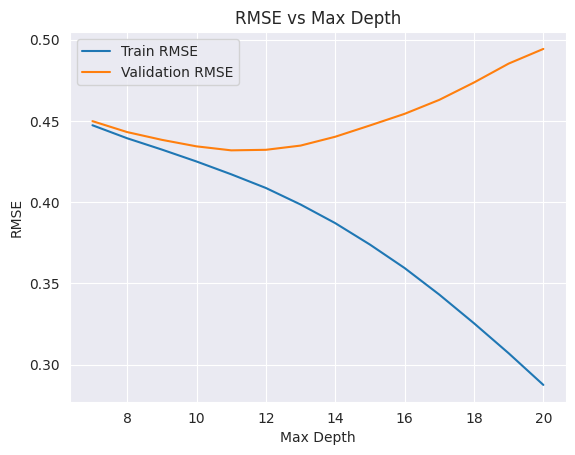

In [149]:
import matplotlib.pyplot as plt

# Создание списков для сохранения значений RMSE
train_rmse_values = []
val_rmse_values = []

# Перебор всех возможных вариантов глубины дерева
max_depths = range(7, 21)  # Используем верхнюю границу 21, чтобы включить 20

for max_depth in max_depths:
    # Создание экземпляра модели дерева решений с текущей глубиной
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Обучение модели на нормализованных факторах и логарифмированной целевой переменной
    tree_model.fit(train_X_normalized, y_train_log)

    # Прогнозирование на обучающей выборке
    train_y_pred_log = tree_model.predict(train_X_normalized)

    # Прогнозирование на валидационной выборке
    val_y_pred_log = tree_model.predict(val_X_normalized)

    # Расчет метрики RMSLE на тренировочной выборке
    train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)
    # Расчет метрики RMSLE на валидационной выборке
    val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)

    # Добавление значений RMSE в списки
    train_rmse_values.append(train_rmsle)
    val_rmse_values.append(val_rmsle)

# Построение линейных графиков изменения метрики RMSE
plt.plot(max_depths, train_rmse_values, label='Train RMSE')
plt.plot(max_depths, val_rmse_values, label='Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max Depth')
plt.legend()
plt.show()


In [152]:
import matplotlib.pyplot as plt

# Создание экземпляра модели дерева решений с текущей глубиной
tree_model = DecisionTreeRegressor(max_depth=12, random_state=42)

# Обучение модели на нормализованных факторах и логарифмированной целевой переменной
tree_model.fit(train_X_normalized, y_train_log)

# Прогнозирование на обучающей выборке
train_y_pred_log = tree_model.predict(train_X_normalized)

# Прогнозирование на валидационной выборке
val_y_pred_log = tree_model.predict(val_X_normalized)

# Расчет метрики RMSLE на тренировочной выборке
train_rmsle = mean_squared_error(train_y_pred_log, y_train_log, squared=False)
# Расчет метрики RMSLE на валидационной выборке
val_rmsle = mean_squared_error(val_y_pred_log, y_valid_log, squared=False)

# Округление до второго знака после точки-разделителя
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

# Вывод результатов
print("RMSLE on train set:", train_rmsle_rounded)
print("RMSLE on validation set:", val_rmsle_rounded)


RMSLE on train set: 0.41
RMSLE on validation set: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Определение модели случайного леса
model = RandomForestRegressor(n_estimators=200, max_depth=12, criterion='squared_error', min_samples_split=20, random_state=42, verbose=True, n_jobs=-1)

# Обучение модели
model.fit(train_X_normalized, y_train_log)

# Расчет предсказаний на тренировочной и валидационной выборках
y_train_pred = model.predict(train_X_normalized)
y_valid_pred = model.predict(val_X_normalized)

# Расчет метрик RMSLE
rmsle_train = mean_squared_error(y_train_log, y_train_pred, squared=False)
rmsle_valid = mean_squared_error(y_valid_log, y_valid_pred, squared=False)

# Округление метрик до второго знака после точки-разделителя
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  8.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.42


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.4s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [157]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Определение модели градиентного бустинга
model = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, max_depth=6, min_samples_split=30, random_state=42, verbose=True)

# Обучение модели
model.fit(train_X_normalized, y_train_log)

# Расчет предсказаний на тренировочной и валидационной выборках
y_train_pred = model.predict(train_X_normalized)
y_valid_pred = model.predict(val_X_normalized)

# Расчет метрик RMSLE
rmsle_train = mean_squared_error(y_train_log, y_train_pred, squared=False)
rmsle_valid = mean_squared_error(y_valid_log, y_valid_pred, squared=False)

# Округление метрик до второго знака после точки-разделителя
rmsle_train = round(rmsle_train, 2)
rmsle_valid = round(rmsle_valid, 2)

print("RMSLE на тренировочной выборке:", rmsle_train)
print("RMSLE на валидационной выборке:", rmsle_valid)


      Iter       Train Loss   Remaining Time 
         1           0.3141           10.37m
         2           0.2271            9.85m
         3           0.2009            9.83m
         4           0.1897            9.58m
         5           0.1842            9.41m
         6           0.1805            9.24m
         7           0.1779            9.12m
         8           0.1750            8.97m
         9           0.1726            8.91m
        10           0.1709            8.86m
        20           0.1599            7.80m
        30           0.1557            6.72m
        40           0.1516            5.72m
        50           0.1484            4.75m
        60           0.1457            3.79m
        70           0.1442            2.84m
        80           0.1422            1.90m
        90           0.1406           56.82s
       100           0.1393            0.00s
RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.4


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Градиентный бустинг вне конкуренции

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


Топ-3 наиболее значимых факторов:
total_distance
total_travel_time
pickup_hour


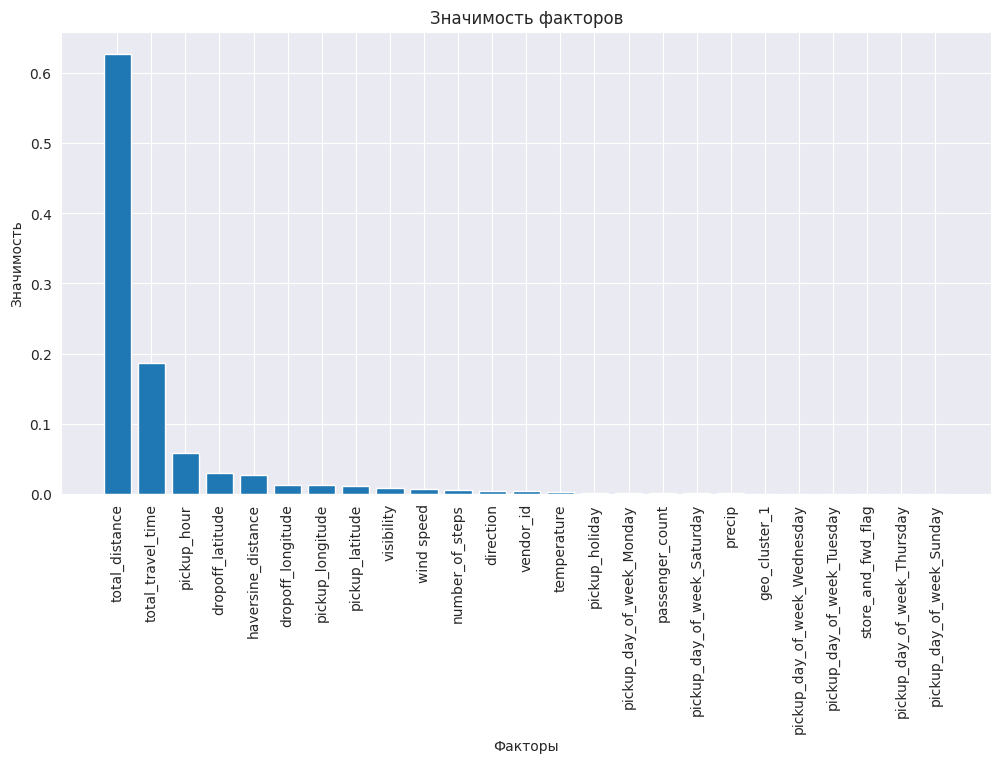

In [158]:
# Получение списка названий факторов
feature_names = X.columns

# Получение списка коэффициентов значимости
importance = model.feature_importances_

# Сортировка факторов по значимости
sorted_indices = importance.argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]

# Вывод топ-3 наиболее значимых факторов
top3_features = sorted_feature_names[:3]
print("Топ-3 наиболее значимых факторов:")
for feature in top3_features:
    print(feature)

# Построение столбчатой диаграммы коэффициентов значимости
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance[sorted_indices])
plt.xticks(range(len(importance)), sorted_feature_names, rotation=90)
plt.xlabel('Факторы')
plt.ylabel('Значимость')
plt.title('Значимость факторов')
plt.show()


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [159]:
from sklearn.metrics import median_absolute_error

# Получение предсказаний для валидационной выборки
y_val_pred = np.exp(model.predict(val_X_normalized))-1

# Расчет медианной абсолютной ошибки (MeAE)
mae = median_absolute_error(np.exp(y_valid_log)-1, y_val_pred)

# Перевод значения MeAE в минуты и округление до десятых
mae_minutes = round(mae / 60, 1)

# Вывод значения MeAE в минутах
print(f"Медианная абсолютная ошибка (MeAE) на валидационной выборке: {mae_minutes} минут")


Медианная абсолютная ошибка (MeAE) на валидационной выборке: 1.8 минут


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [160]:
test_data = read_csv("./data/test_data.csv")
osrm_data_test = read_csv("./data/osrm_data_test.csv")
test_id = test_data['id']

/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])
/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])
/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_datetime(df[c])
/tmp/ipykernel_10218/2653724965.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c]=pd.to_date

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [161]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = encoder.fit_transform(test_data[columns_to_encode]).toarray()
column_names = encoder.get_feature_names_out(columns_to_encode)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_encode, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[selected_feature_names]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/home/dzailz/urfu/project/.venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [162]:
y_test_predict = np.exp(model.predict(X_test_scaled))-1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('./data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [164]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [166]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(train_X_normalized, label=y_train_log, feature_names=selected_feature_names)
dvalid = xgb.DMatrix(val_X_normalized, label=y_valid_log, feature_names=selected_feature_names)
dtest = xgb.DMatrix(X_test_scaled, feature_names=selected_feature_names)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [167]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, # гиперпараметры модели
    dtrain=dtrain, # обучающая выборка
    num_boost_round=300, # количество моделей в ансамбле
    evals=watchlist, # выборки, на которых считается матрица
    early_stopping_rounds=20, # ранняя остановка
    maximize=False, # смена поиска максимума на минимум
    verbose_eval=10 # шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42055	valid-rmse:5.42030
[10]	train-rmse:1.93555	valid-rmse:1.93555
[20]	train-rmse:0.78675	valid-rmse:0.78765
[30]	train-rmse:0.48153	valid-rmse:0.48364
[40]	train-rmse:0.42369	valid-rmse:0.42649
[50]	train-rmse:0.41167	valid-rmse:0.41484
[60]	train-rmse:0.40673	valid-rmse:0.41027
[70]	train-rmse:0.40337	valid-rmse:0.40734
[80]	train-rmse:0.40117	valid-rmse:0.40543
[90]	train-rmse:0.39951	valid-rmse:0.40404
[100]	train-rmse:0.39773	valid-rmse:0.40254
[110]	train-rmse:0.39644	valid-rmse:0.40163
[120]	train-rmse:0.39484	valid-rmse:0.40034
[130]	train-rmse:0.39386	valid-rmse:0.39970
[140]	train-rmse:0.39310	valid-rmse:0.39935
[150]	train-rmse:0.39203	valid-rmse:0.39861
[160]	train-rmse:0.39099	valid-rmse:0.39796
[170]	train-rmse:0.39020	valid-rmse:0.39747
[180]	train-rmse:0.38937	valid-rmse:0.39698
[190]	train-rmse:0.38822	valid-rmse:0.39628
[200]	train-rmse:0.38751	valid-rmse:0.39597
[210]	train-rmse:0.38681	valid-rmse:0.39557
[220]	train-rmse:0.38627	valid-rmse:0.39542

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [168]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39361


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

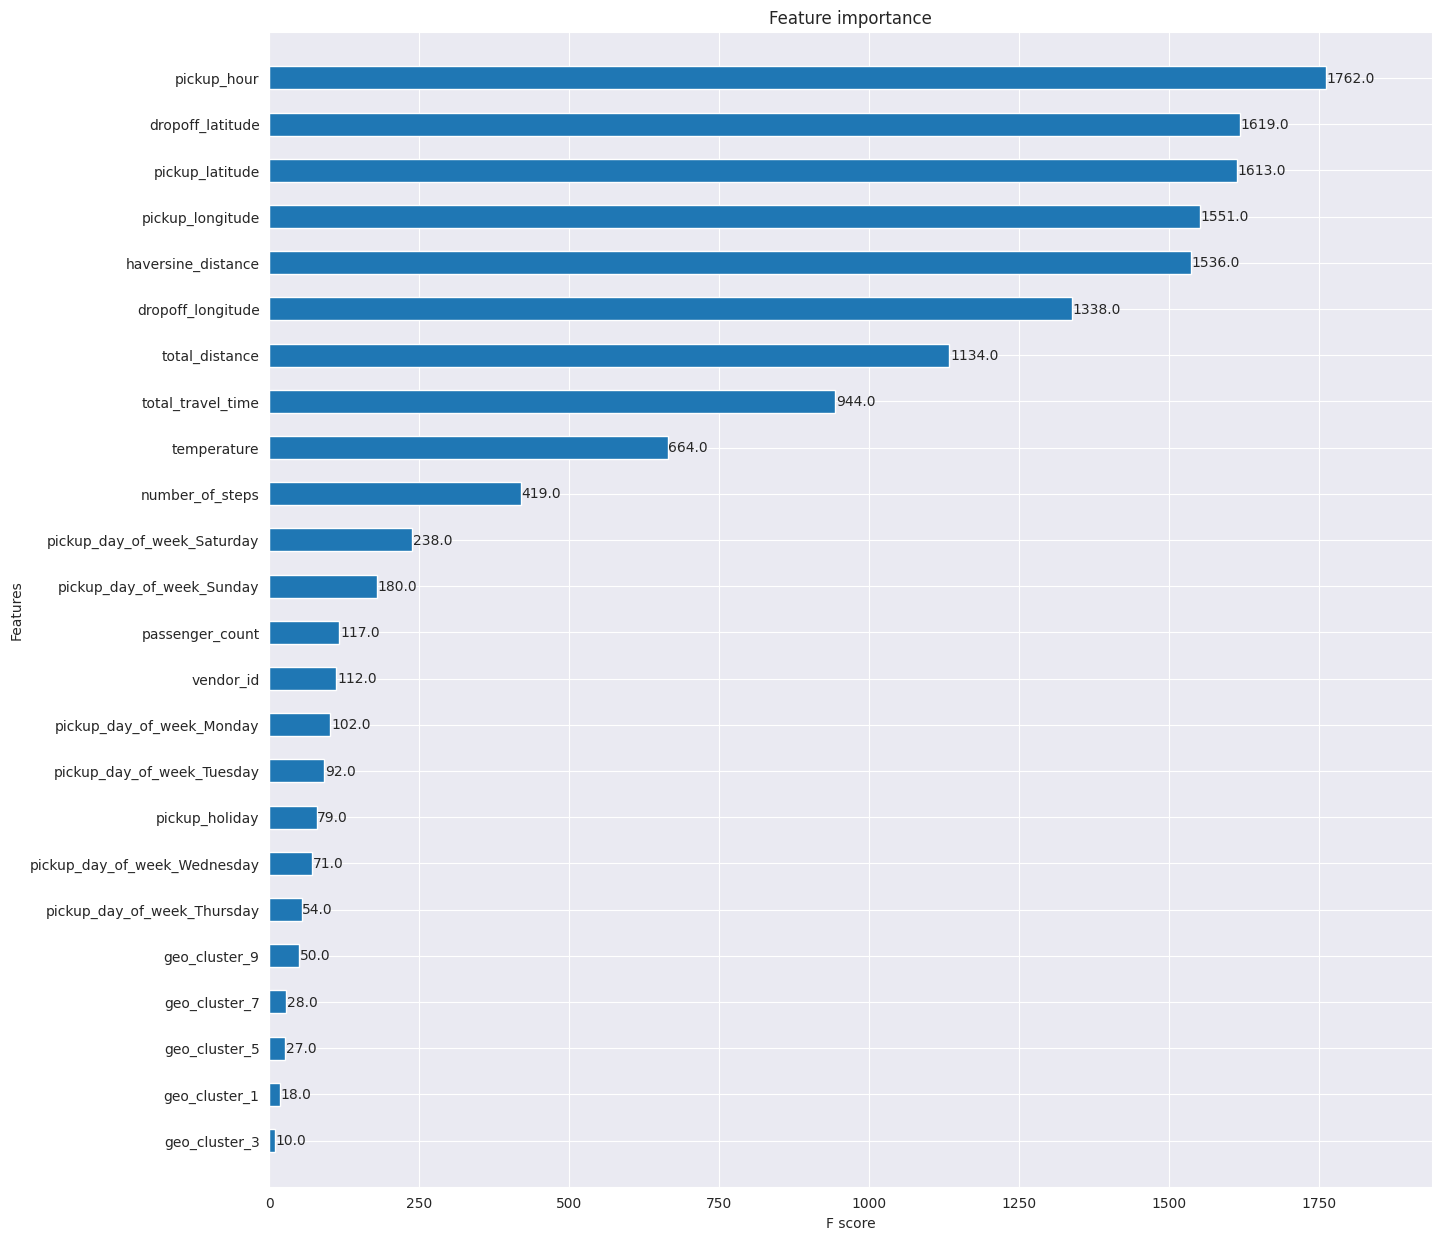

In [169]:
fig, ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(model, ax=ax, height=0.5)